<a href="https://colab.research.google.com/github/dsaint31x/OpenCV_Python_Tutorial/blob/master/DIP/DIP_deconv_richardson_lucy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!conda install packaging

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.13.0
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



In [111]:
import skimage
from packaging.version import parse

old_version = True
# from distutils.version import StrictVersion
# if  StrictVersion('0.19.2') < StrictVersion(skimage.__version__) :
#     old_version = False

if parse('0.19.2') <= parse(skimage.__version__):
    old_version = False

    
print(f'skimage_version : {skimage.__version__}')

skimage_version : 0.19.2


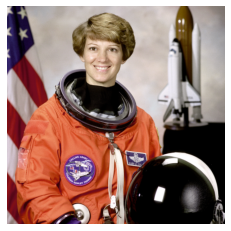

In [112]:
from skimage import data
import matplotlib.pyplot as plt

astro = data.astronaut()

plt.imshow(astro)
plt.axis('off')
plt.show()

range : 0 ~ 255
range : 0.0 ~ 1.0


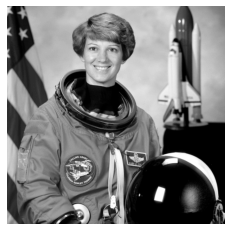

In [113]:
import cv2

astro_gray = cv2.cvtColor(astro,cv2.COLOR_RGB2GRAY)
print(f'range : {astro_gray.min()} ~ {astro_gray.max()}')

# min-max normalization
astro_gray = (astro_gray - astro_gray.min())/(astro_gray.max()-astro_gray.min())
print(f'range : {astro_gray.min()} ~ {astro_gray.max()}')

plt.imshow(astro_gray)
plt.axis('off')
plt.show()

# Grayscale Version

In [114]:
astro_gray = cv2.cvtColor(astro,cv2.COLOR_BGR2GRAY)
astro_gray = astro_gray/255.

print(f'range : {astro_gray.min()} ~ {astro_gray.max()}')

range : 0.0 ~ 1.0


shape : (512, 512) > (512, 512)


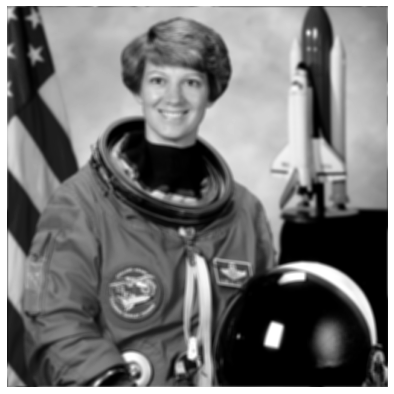

shape : (512, 512) > (512, 512)


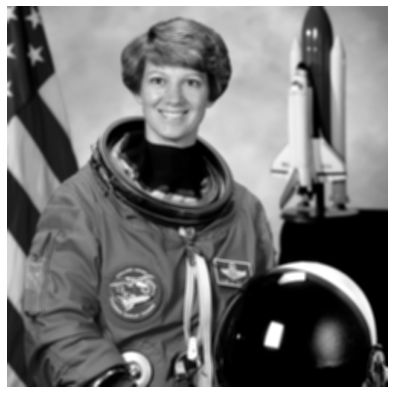

In [115]:
from scipy.signal import convolve2d
import numpy as np
import cv2

psf_size = 5 
psf = np.ones( (psf_size, psf_size)) / (psf_size**2)
astro_gray_blurred = convolve2d(astro_gray, psf, 'same', 'wrap' ) 
# astro_gray_blurred = convolve2d(astro_gray, psf ) # full mode (default) : shape will be changed. 
astro_gray_blurred_cv2 = cv2.filter2D(astro_gray, ddepth=-1,kernel=psf)

print(f'shape : {astro_gray.shape} > {astro_gray_blurred.shape}')
plt.figure(figsize=(7,7))
plt.imshow(astro_gray_blurred)
plt.axis('off')
plt.show()

print(f'shape : {astro_gray.shape} > {astro_gray_blurred_cv2.shape}')
plt.figure(figsize=(7,7))
plt.imshow(astro_gray_blurred_cv2)
plt.axis('off')
plt.show()



shape of astro_noise:(512, 512)
range of astro_noise:0.0~1.2705882352941176


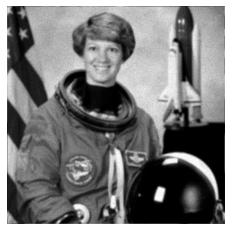

In [116]:
import ast
import numpy as np

rng = np.random.default_rng()
astro_gray_noisy = rng.poisson(lam=astro_gray_blurred*255.,size=astro_gray.shape) /255. # add poisson noise!
print(f'shape of astro_noise:{astro_gray_noisy.shape}')
print(f'range of astro_noise:{astro_gray_noisy.min()}~{astro_gray_noisy.max()}')

astro_gray_noisy[astro_gray_noisy>1.]=1.

plt.imshow(astro_gray_noisy)
plt.axis('off')
plt.show()


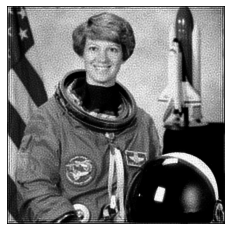

In [117]:
from skimage import restoration

# ------------------------------------
# deconv
# Restore Image using Richardson-Lucy algorithm, scikit-image 2.x
if not old_version: 
    deconvolved_RL = restoration.richardson_lucy(astro_gray_noisy, psf, num_iter=30)
else:
    # Restore Image using Richardson-Lucy algorithm, scikit-image 1.8
    deconvolved_RL = restoration.richardson_lucy(astro_gray_noisy, psf, iterations=30)
    
plt.imshow(deconvolved_RL)
plt.axis('off')
plt.show()

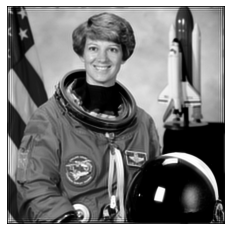

In [118]:
# ------------------------------------
# deconv
# Restore Image using Richardson-Lucy algorithm, scikit-image 2.x
if not old_version: 
    deconvolved_RL_tmp = restoration.richardson_lucy(astro_gray_blurred, psf, num_iter=30)
else:
    # Restore Image using Richardson-Lucy algorithm, scikit-image 1.8
    deconvolved_RL_tmp = restoration.richardson_lucy(astro_gray_blurred, psf, iterations=30)
    
plt.imshow(deconvolved_RL_tmp)
plt.axis('off')
plt.show()

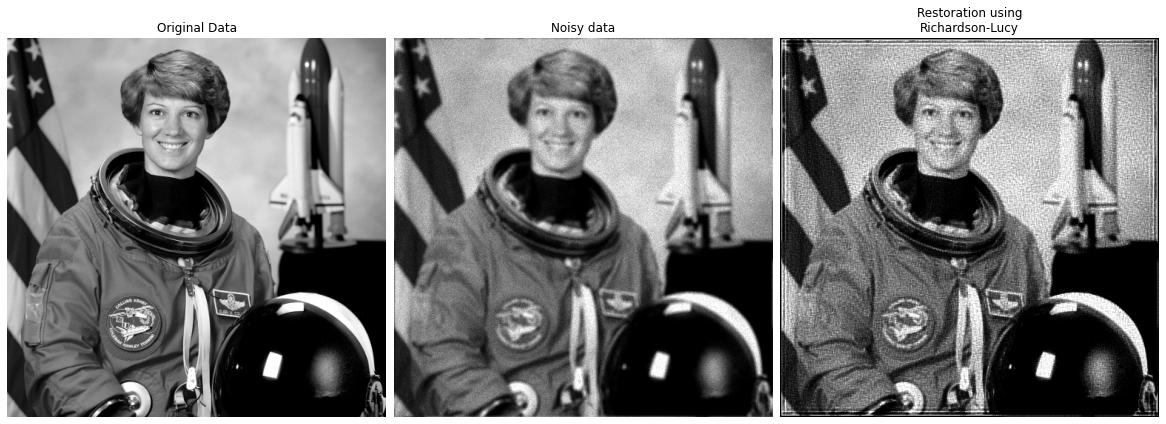

In [119]:
# display
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 10))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
    a.axis('off')

ax[0].imshow(astro_gray)
ax[0].set_title('Original Data')

ax[1].imshow(astro_gray_noisy)
ax[1].set_title('Noisy data')

ax[2].imshow(deconvolved_RL, vmin=astro_gray_noisy.min(), vmax=astro_gray_noisy.max())
ax[2].set_title('Restoration using\nRichardson-Lucy')

fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()

# Color Version

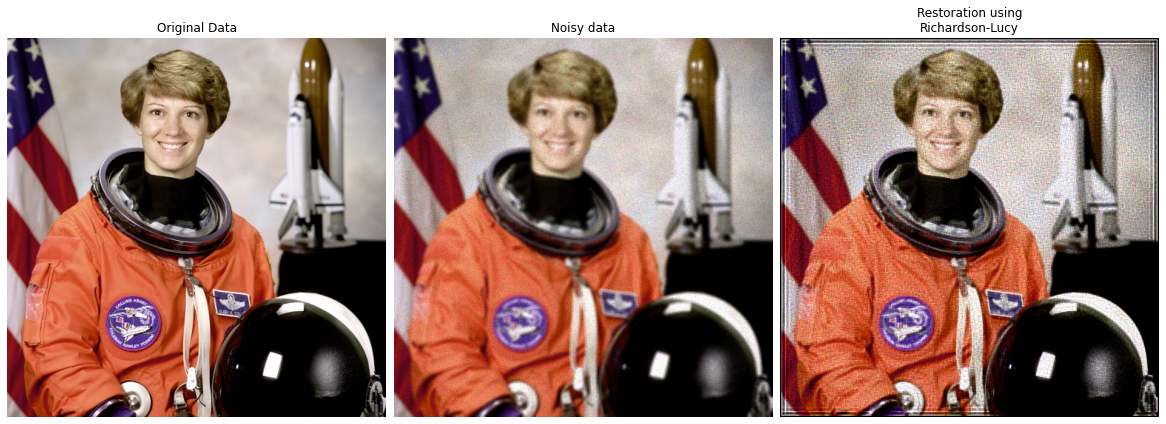

In [120]:
astro = data.astronaut()
astro = astro.astype(np.float64)/255.

# bluring
psf_size = 5
psf = np.ones((psf_size, psf_size,1)) / (psf_size**2)

astro_blurred = cv2.filter2D(src=astro, ddepth=-1,kernel=psf )

# Add Noise to Image
rng = np.random.default_rng()
astro_noisy = astro_blurred.copy()
astro_noisy = (rng.poisson(lam=astro_noisy*255., size=astro_blurred.shape) ) / 255.

astro_noisy[astro_noisy <0.] = 0.
astro_noisy[astro_noisy >1.] = 1.


# ------------------------------------
# deconv
# Restore Image using Richardson-Lucy algorithm, scikit-image 2.x
if not old_version: 
    deconvolved_RL = restoration.richardson_lucy(astro_noisy, psf, num_iter=30)
else:
    # Restore Image using Richardson-Lucy algorithm, scikit-image 1.8
    deconvolved_RL = restoration.richardson_lucy(astro_noisy, psf, iterations=30)

deconvolved_RL[deconvolved_RL<0.] = 0.
deconvolved_RL[deconvolved_RL>1.] = 1.
# end -------------------------------


# display
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 10))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
    a.axis('off')

ax[0].imshow(astro)
ax[0].set_title('Original Data')

ax[1].imshow(astro_noisy)
ax[1].set_title('Noisy data')

ax[2].imshow(deconvolved_RL, vmin=astro_noisy.min(), vmax=astro_noisy.max())
ax[2].set_title('Restoration using\nRichardson-Lucy')

fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()

# ing...

In [121]:
import numpy as np
from scipy.stats import multivariate_normal

In [122]:
def get_psf(px, sigma):
    half_px = px // 2
    x, y = np.mgrid[-half_px:half_px+1:, -half_px:half_px+1:]
    pos = np.dstack((x, y))
    mean = np.array([0, 0]) 
    cov = np.array([[sigma**2, 0], [0, sigma**2]]) 
    rv = multivariate_normal(mean, cov)
    psf = rv.pdf(pos)
    return psf

In [123]:
psf = get_psf(5,2)

In [124]:
import matplotlib.pyplot as plt

def ds_plot(img_gray) :
  h,w = img_gray.shape
  x,y =np.mgrid[0:h,0:w]

  ax = plt.figure().gca(projection='3d')
  surf = ax.plot_surface(x,y,img_gray,
                         # cmap=plt.cm.gray
                         )
  ax.set_zticks([]);ax.set_yticks([]);ax.set_xticks([])
  # 80 : the elevation angle in the z plane (in degrees).
  # 20 : the azimuth angle in the (x, y) plane (in degrees).
  ax.view_init(10,20) 
  plt.gcf().colorbar(surf,shrink=1,aspect=10)

/tmp/ipykernel_632/3163503213.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure().gca(projection='3d')


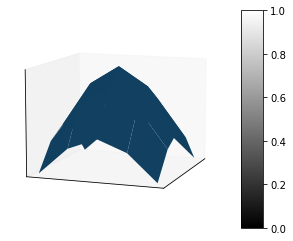

In [97]:
ds_plot(psf)